# ***HOUSE PRICE PREDICTION***
- **Using LinearRegeressionModel**
- **Using RandomForestModel**
### *[Dataset Used](https://www.kaggle.com/datasets/camnugent/california-housing-prices)*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Float variables: 9


In [5]:
fl_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

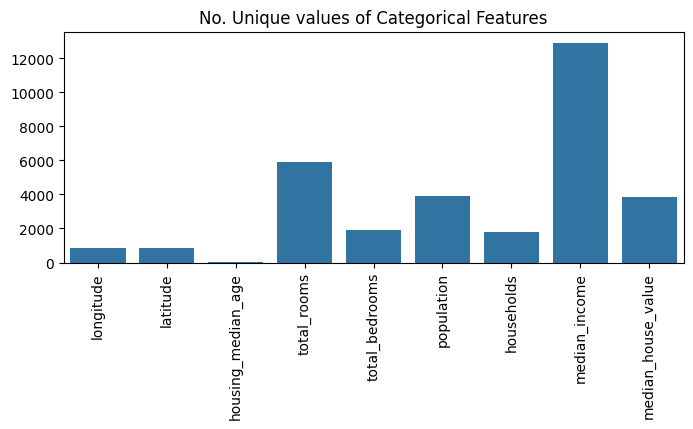

In [6]:
unique_values = []
for col in fl_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(8,3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=fl_cols,y=unique_values)

In [7]:
# deletes the NULL values and replaces it in the original data
data.dropna(inplace=True)

In [8]:
#train test splits the dataset as Xtrain Xtest Ytrain Ytest
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [9]:
#test_size is indicate how much percentage of data should be alloted

x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
train_data= x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17858,-121.87,37.46,43.0,91.0,12.0,58.0,16.0,15.0001,<1H OCEAN,500001.0
3219,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,INLAND,81700.0
18587,-121.80,36.94,29.0,2377.0,476.0,1669.0,499.0,2.8214,<1H OCEAN,190100.0
4405,-118.24,34.08,52.0,109.0,20.0,86.0,24.0,4.9844,<1H OCEAN,187500.0
2407,-119.43,36.61,19.0,1484.0,296.0,1296.0,298.0,2.4219,INLAND,65800.0
...,...,...,...,...,...,...,...,...,...,...
7390,-118.24,33.96,34.0,1724.0,432.0,1876.0,416.0,2.1078,<1H OCEAN,100600.0
2768,-115.94,33.38,5.0,186.0,43.0,41.0,21.0,2.7000,INLAND,58800.0
4848,-118.31,34.02,45.0,1423.0,278.0,822.0,276.0,2.4519,<1H OCEAN,98100.0
14089,-117.11,32.76,31.0,2293.0,549.0,1108.0,557.0,3.3854,NEAR OCEAN,204400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

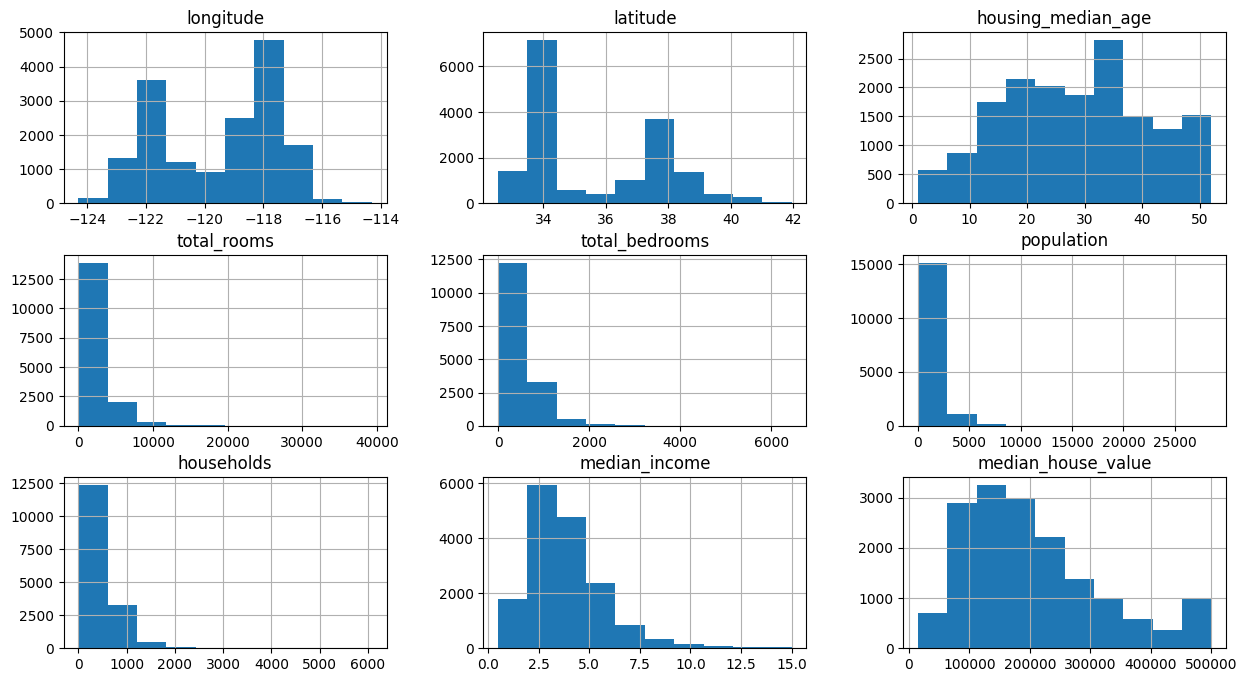

In [12]:
#hist() is to histrographic representation of data and figsize is to set figure size (x,y)
train_data.hist(figsize=(15,8))

<Axes: >

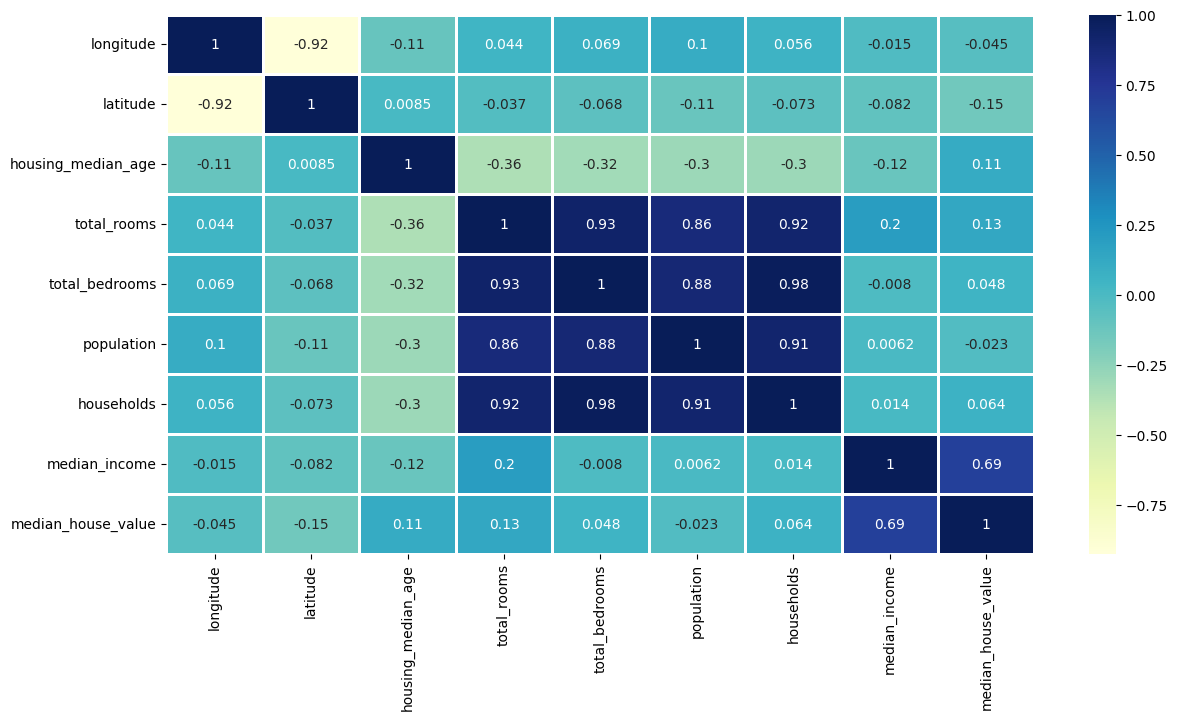

In [13]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu",linewidths = 2)

In [14]:
train_data['total_rooms']=np.log(train_data['total_rooms'] +1 )
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] +1 )
train_data['population']=np.log(train_data['population'] +1 )
train_data['households']=np.log(train_data['households'] +1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

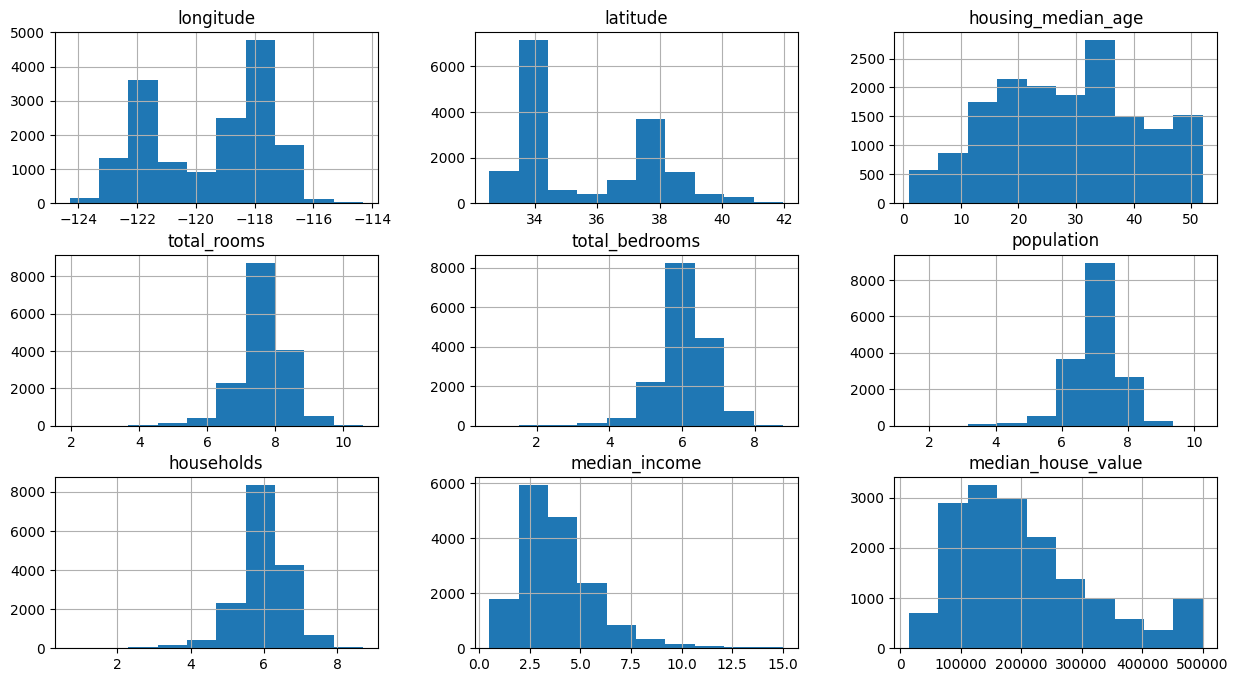

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
#to convert and categorizethe ocean proximity as binary feature
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5224
NEAR OCEAN    2077
NEAR BAY      1810
ISLAND           4
Name: count, dtype: int64

In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: xlabel='latitude', ylabel='longitude'>

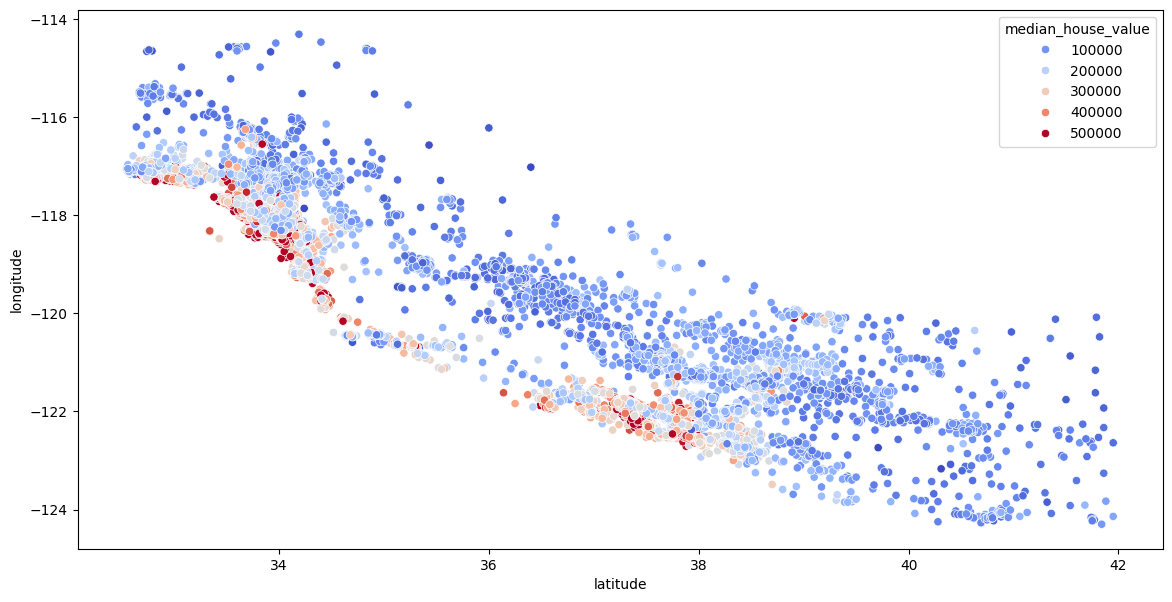

In [18]:
plt.figure(figsize=(14,7))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [19]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17858,-121.87,37.46,43.0,4.521789,2.564949,4.077537,2.833213,15.0001,500001.0,True,False,False,False,False,0.567242,1.595993
3219,-119.67,36.33,19.0,7.124478,5.501258,6.746412,5.472271,2.9375,81700.0,False,True,False,False,False,0.772163,1.301924
18587,-121.80,36.94,29.0,7.774015,6.167516,7.420579,6.214608,2.8214,190100.0,True,False,False,False,False,0.793350,1.250926
4405,-118.24,34.08,52.0,4.700480,3.044522,4.465908,3.218876,4.9844,187500.0,True,False,False,False,False,0.647705,1.460286
2407,-119.43,36.61,19.0,7.303170,5.693732,7.167809,5.700444,2.4219,65800.0,False,True,False,False,False,0.779625,1.281158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,-118.24,33.96,34.0,7.452982,6.070738,7.537430,6.033086,2.1078,100600.0,True,False,False,False,False,0.814538,1.235352
2768,-115.94,33.38,5.0,5.231109,3.784190,3.737670,3.091042,2.7000,58800.0,False,True,False,False,False,0.723401,1.692344
4848,-118.31,34.02,45.0,7.261225,5.631212,6.712956,5.624018,2.4519,98100.0,True,False,False,False,False,0.775518,1.291110
14089,-117.11,32.76,31.0,7.738052,6.309918,7.011214,6.324359,3.3854,204400.0,False,False,False,False,True,0.815440,1.223531


<Axes: >

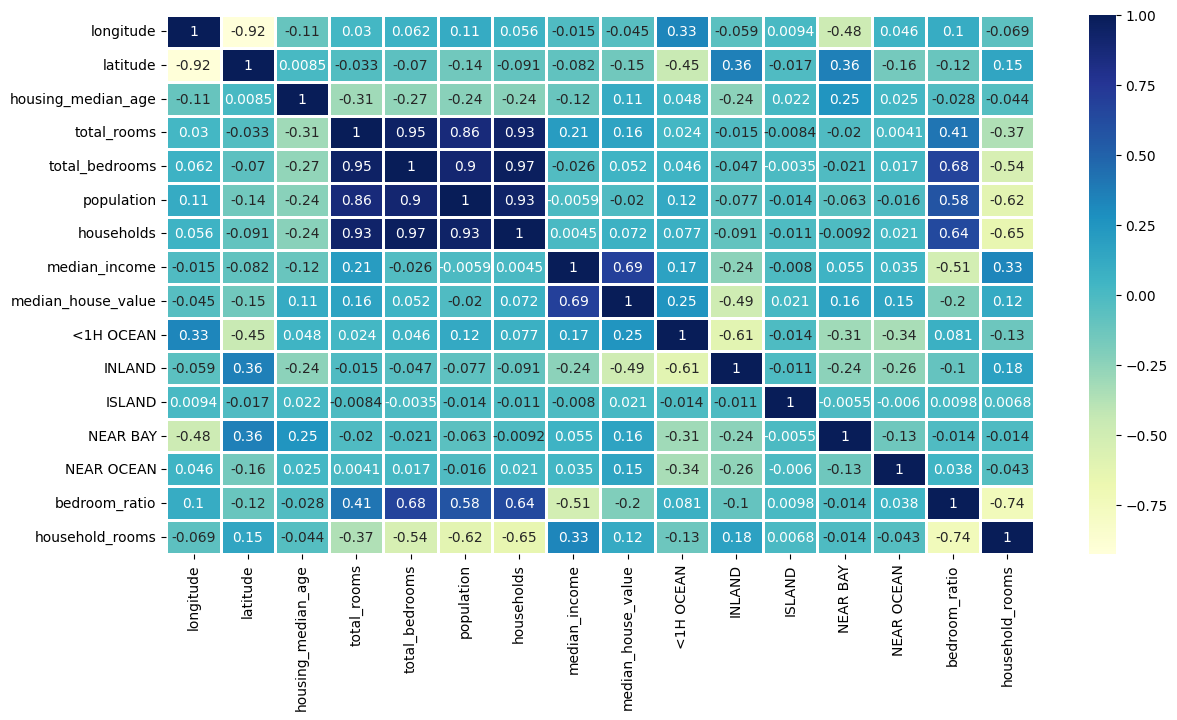

In [21]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu",linewidths = 2)

In [22]:
#using Linear Regression
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression ()
reg.fit(x_train, y_train)



LinearRegression()

In [23]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data[ 'total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [24]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [26]:
reg.score(x_test,y_test)

0.6746030755205623

In [27]:
#using Random Forest model
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test,y_test)

0.8136308191756043